In [1]:
import pandas as pd
import geopandas as gp
import numpy as np

# Iterate through the tod tables to create plots of trips

In [2]:
#filter out the trips with a trip end outisde of cook county 


#filter out the trips with a trip end outside of Chicago city limits

#filter out the trips that are suppressed to having a community area as their origin/destination because there are
## less than 3 trips between an OD pair during a 15 minute windown

In [2]:
tods = [1,2,3,4,5]

In [3]:
dows = ['Weekday', 'Weekend']

In [4]:
df_all = pd.DataFrame()

In [5]:
#df = pd.read_hdf('C:/Workspace/TNC-Demand-Model/Inputs/Chicago_TNC_Trips_20.H5', 'Weekday_1')
#df.head()
#len(df)

In [6]:
#df = pd.read_hdf('C:/Workspace/TNC-Demand-Model/Inputs/Chicago_TNC_Trips_20.H5', 'Weekend_1')
#df.head()
#len(df)

In [7]:
for dow in dows:
    print('Working on dow ' + dow)
    df_all = pd.DataFrame()
    
    for tod in tods:
        print("Working on tod " + str(tod))

        print('Reading in the data!')
        df = pd.read_hdf('D:/TNC-Demand-Model/Inputs/Chicago Ride-Hailing/Chicago_TNC_Trips_20.H5', key = dow + '_' + str(tod))
        
        print('Processing the data!')
        df = df[~((np.isnan(df['Dropoff Community Area']))|(np.isnan(df['Pickup Community Area'])))]
        #df = df[df['Trip Seconds']>0]
        #df['SPEED'] = df['Trip Miles']/(df['Trip Seconds']/3600)
        #df = df[(df['SPEED'] > 5)&(df['SPEED'] < 70)]
        
        df['TRIPS'] = 1
        df['SHARED_TRIPS'] = np.where(df['Shared Trip Authorized'] == True, 1, 0)
        df['PRIVATE_TRIPS'] = np.where(df['Shared Trip Authorized'] == False, 1, 0)
        df['SHARED_FARE'] = np.where(df['Shared Trip Authorized'] == True, df['Fare'], np.nan)
        df['PRIVATE_FARE'] = np.where(df['Shared Trip Authorized'] == False, df['Fare'], np.nan)

        df['DAY'] = df['Trip Start Timestamp'].dt.day
        
        agg = {'YEAR':'first','MONTH':'first','Fare':'mean','PRIVATE_FARE':'mean','SHARED_FARE':'mean','Trip Total':'sum','Trip Miles':'sum','Trips Pooled':'sum','PRIVATE_TRIPS':'sum','SHARED_TRIPS':'sum','TRIPS':'sum'}
        
        df = df.groupby(by = ['YEAR','MONTH','DAY'],as_index = False).agg(agg)
        #df = df.groupby(by = ['YEAR','MONTH','Pickup Census Tract','Dropoff Census Tract'], as_index = False).mean()
        df2 = df.groupby(by = ['YEAR','MONTH']).mean()

        df_all = df.append(df_all)


        print('Making plots of the data!')
        
        plot = df2['TRIPS'].plot()
        fig = plot.get_figure()
        fig.autofmt_xdate()
        fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Trip Total Plots/TRIPS_' + str(tod) + '.pdf')
        fig.clear()

        plot = df2['SHARED_TRIPS'].plot()
        fig = plot.get_figure()
        fig.autofmt_xdate()
        fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Trip Total Plots/SHARED_TRIPS_' + str(tod) + '.pdf')
        fig.clear()

        plot = df2['PRIVATE_TRIPS'].plot()
        fig = plot.get_figure()
        fig.autofmt_xdate()
        fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Trip Total Plots/PRIVATE_TRIPS_' + str(tod) + '.pdf')
        fig.clear()

        plot = df2['Fare'].plot()
        fig = plot.get_figure()
        fig.autofmt_xdate()
        fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Fare Plots/Fare_' + str(tod) + '.pdf')
        fig.clear()

        plot = df2['SHARED_FARE'].plot()
        fig = plot.get_figure()
        fig.autofmt_xdate()
        fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Fare Plots/SHARED_FARE_' + str(tod) + '.pdf')
        fig.clear()

        plot = df2['PRIVATE_FARE'].plot()
        fig = plot.get_figure()
        fig.autofmt_xdate()
        fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Fare Plots/PRIVATE_FARE_' + str(tod) + '.pdf')
        fig.clear()
        

    agg = {'Fare':'mean','PRIVATE_FARE':'mean','SHARED_FARE':'mean','Trip Total':'sum','Trip Miles':'sum','Trips Pooled':'sum','PRIVATE_TRIPS':'sum','SHARED_TRIPS':'sum','TRIPS':'sum'}

    df_all = df_all.groupby(by = ['YEAR','MONTH','DAY'],as_index = False).agg(agg)
    df_all = df_all.groupby(by = ['YEAR','MONTH']).mean()

    print('Making plots of aggregated data')

    plot = df_all['TRIPS'].plot()
    fig = plot.get_figure()
    fig.autofmt_xdate()
    fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Trip Total Plots/TRIPS_ALL_DAY.pdf')
    fig.clear()

    plot = df_all['SHARED_TRIPS'].plot()
    fig = plot.get_figure()
    fig.autofmt_xdate()
    fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Trip Total Plots/SHARED_TRIPS_ALL_DAY.pdf')
    fig.clear()

    plot = df_all['PRIVATE_TRIPS'].plot()
    fig = plot.get_figure()
    fig.autofmt_xdate()
    fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Trip Total Plots/PRIVATE_TRIPS_ALL_DAY.pdf')
    fig.clear()

    plot = df_all['Fare'].plot()
    fig = plot.get_figure()
    fig.autofmt_xdate()
    fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Fare Plots/Fare_ALL_DAY_20.pdf')
    fig.clear()

    plot = df_all['SHARED_FARE'].plot()
    fig = plot.get_figure()
    fig.autofmt_xdate()
    fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Fare Plots/SHARED_FARE_ALL_DAY_20.pdf')
    fig.clear()

    plot = df_all['PRIVATE_FARE'].plot()
    fig = plot.get_figure()
    fig.autofmt_xdate()
    fig.savefig('D:/TNC-Demand-Model/Data Exploration/' + dow + '/Fare Plots/PRIVATE_FARE_ALL_DAY_20.pdf')
    fig.clear()

print('Complete')

Working on dow Weekday
Working on tod 1
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 2
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 3
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 4
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 5
Reading in the data!
Processing the data!
Making plots of the data!
Making plots of aggregated data
Working on dow Weekend
Working on tod 1
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 2
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 3
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 4
Reading in the data!
Processing the data!
Making plots of the data!
Working on tod 5
Reading in the data!
Processing the data!
Making plots of the data!
Making plots of aggregated data
Complete


<Figure size 432x288 with 0 Axes>

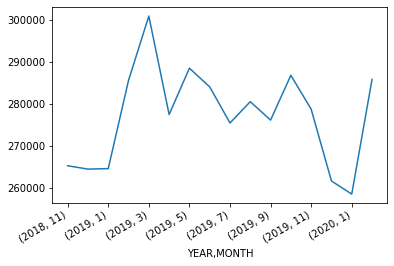

In [8]:
plot = df_all['TRIPS'].plot()
fig = plot.get_figure()
fig.autofmt_xdate()

# Calculating how many trips are "external"

### The Chicago ridehailing dataset includes trips with only one trip end within Chicago city limits
### Need to determine whether I will include the external trips in the analysis or not 

In [11]:
chi = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Chicago Tracts/geo_export_558aad9f-98d8-4dd5-a6b1-c1730155d596.shp')

In [12]:
chi.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


In [13]:
rh = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/2019_Weekday_Ridehail.csv')

In [14]:
rh_external_origin = rh[~rh['Pickup Census Tract'].isin(chi['geoid10'])]

In [15]:
rh_external_origin_destination = rh_external_origin[~rh_external_origin['Dropoff Census Tract'].isin(chi['geoid10'])]
rh_external_origin_destination.head()

,Unnamed: 0,Pickup Census Tract,Dropoff Census Tract,MONTH,DAY,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,PRIVATE_TRIPS,SHARED_TRIPS,Trips Pooled,TOD,GEOID_PICKUP,GEOID_DROPOFF,SCALED_SUP_PRIVATE_TRIPS,SCALED_SUP_SHARED_TRIPS,ALL_TRIPS
101940,101940,1.703177e+10,1.703177e+10,1.527778,15.583333,910.477155,7.595876,11.776547,0.711027,2.730163,15.217738,NaN,NaN,11.222222,1,NaN,NaN,NaN,NaN,NaN
101941,101941,1.703177e+10,1.703180e+10,2.000000,28.000000,1215.000000,10.200000,12.500000,5.000000,0.000000,17.500000,NaN,NaN,1.000000,1,NaN,NaN,NaN,NaN,NaN
101942,101942,1.703177e+10,1.703180e+10,1.000000,10.000000,1362.000000,16.300000,22.500000,0.000000,8.700000,31.200000,NaN,NaN,1.000000,1,NaN,NaN,NaN,NaN,NaN
101943,101943,1.703177e+10,1.703181e+10,2.000000,15.000000,2370.000000,16.700000,22.500000,0.000000,3.890000,26.390000,NaN,NaN,1.000000,1,NaN,NaN,NaN,NaN,NaN
148517,148517,1.703177e+10,1.703177e+10,2.000000,20.000000,640.500000,2.850000,10.000000,1.000000,2.700000,13.700000,NaN,NaN,1.000000,2,NaN,NaN,NaN,NaN,NaN


In [16]:
rh_external_origin_destination.to_csv('Trips to and from outside of Chicago.csv')

In [29]:
rh_external_origin = rh[~rh['Pickup Census Tract'].isin(chi['geoid10'])]

In [30]:
rh_external_dest = rh[~rh['Dropoff Census Tract'].isin(chi['geoid10'])]

In [36]:
rh.head()

,Unnamed: 0,Pickup Census Tract,Dropoff Census Tract,MONTH,DAY,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,PRIVATE_TRIPS,SHARED_TRIPS,Trips Pooled,TOD
0,0,1.703101e+10,1.703101e+10,1.545455,14.681818,357.088636,1.089394,4.126894,0.606061,2.351250,7.084205,1.272727,0.409091,1.772727,1
1,1,1.703101e+10,1.703101e+10,1.482759,15.310345,285.902299,1.069540,3.735632,0.068966,2.387069,6.191667,0.896552,0.655172,1.862069,1
2,2,1.703101e+10,1.703101e+10,1.384615,16.000000,230.307692,0.576923,2.884615,0.076923,2.153846,5.115385,0.461538,0.692308,1.307692,1
3,3,1.703101e+10,1.703101e+10,1.500000,14.333333,206.625000,0.700000,3.333333,0.250000,2.125000,5.708333,0.916667,0.333333,1.416667,1
4,4,1.703101e+10,1.703101e+10,1.588235,10.764706,365.431373,1.462745,4.950980,0.490196,1.647059,7.088235,0.529412,0.588235,1.294118,1


In [43]:
(rh_external_origin.PRIVATE_TRIPS.sum() + rh_external_origin.SHARED_TRIPS.sum() + rh_external_dest.PRIVATE_TRIPS.sum() + rh_external_dest.SHARED_TRIPS.sum()) / (rh.PRIVATE_TRIPS.sum() + rh.SHARED_TRIPS.sum())

0.01561132958219678

## Roughly 1.5% of trips are "external" trips... a seeminly neglible amount of the trip totals

### Intial reaction is to drop them out of the analysis and acknowledge it as a limitation of the study... need to remember this when applying the model in Mass. because the model will likely underestimate ridership.

In [42]:
rh_external_dest.PRIVATE_TRIPS.sum() / rh.PRIVATE_TRIPS.sum()

0.010758519559046274

In [41]:
rh_external_dest.SHARED_TRIPS.sum() / rh.SHARED_TRIPS.sum()

0.005582438012030641

In [37]:
rh_external_origin.PRIVATE_TRIPS.sum() / rh.PRIVATE_TRIPS.sum()

0.008095744833106707

In [38]:
rh_external_origin.SHARED_TRIPS.sum() / rh.SHARED_TRIPS.sum()

0.004395607325270351

In [51]:
rh_external_origin.PRIVATE_TRIPS.sum() + rh_external_origin.SHARED_TRIPS.sum()

6128.023293617738

In [52]:
rh_external_dest.PRIVATE_TRIPS.sum() + rh_external_dest.SHARED_TRIPS.sum()

8057.632697163333